In [3]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
FILE_PATH = "../MovieData_Clean.csv"

In [5]:
df = pd.read_csv(FILE_PATH)
print(df.shape)
df.head()

(714, 12)


,Movie_Title,Released_Year,Rating,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross,Num_Genres
0,The Shawshank Redemption,1994,R,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469,1
1,The Godfather,1972,R,175,Crime,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411,2
2,The Dark Knight,2008,PG-13,152,Action,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444,3
3,The Godfather: Part II,1974,R,202,Crime,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000,2
4,12 Angry Men,1957,G,96,Crime,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000,2


In [6]:
all_genres = df.explode('Genre')['Genre'].unique()
print(all_genres)

['Drama' 'Crime' 'Action' 'Biography' 'Western' 'Comedy' 'Adventure'
 'Animation' 'Horror' 'Mystery' 'Film-Noir' 'Family']


In [7]:
#check for missing values 
missing_or_empty = df['Genre'].isna() | (df['Genre'] == '')

missing_or_empty_count = missing_or_empty.sum()

print(f"Number of missing or empty values in the 'Genre' column: {missing_or_empty_count}")

Number of missing or empty values in the 'Genre' column: 0


In [8]:
#Type of Genre column
print(type(df['Genre'].iloc[0]))

<class 'str'>


In [9]:
# Fixing the 'Genre' column if it's a string representation of a list
df['Genre'] = df['Genre'].apply(lambda x: x.strip("[]").replace('"', '').split(",") if isinstance(x, str) else x)

# Group by 'No_of_Votes' and aggregate genres 
genres_per_votes = df.groupby('No_of_Votes')['Genre'].apply(lambda genres: list(set([genre.strip() for sublist in genres for genre in sublist]))).reset_index()

# Display the result
print(genres_per_votes.head())


   No_of_Votes        Genre
0        25229  [Animation]
1        25938      [Drama]
2        26337     [Comedy]
3        27007     [Horror]
4        27067      [Drama]


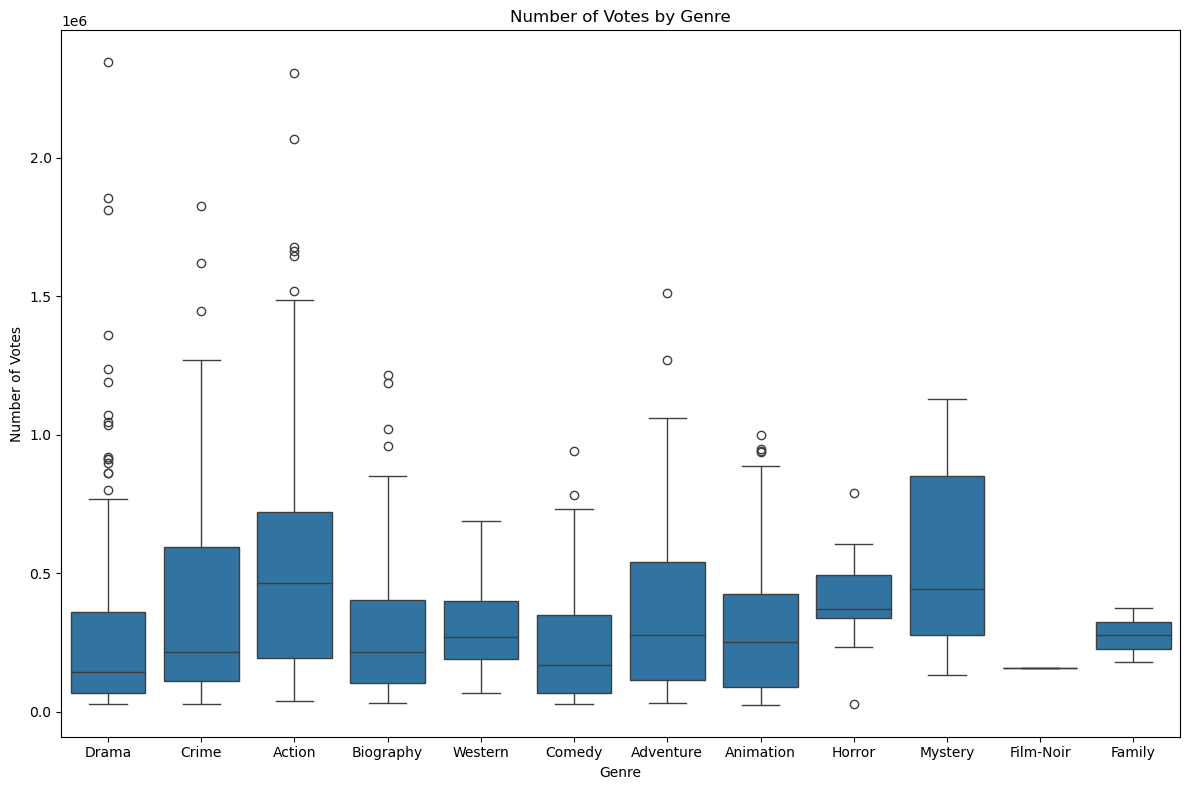

In [18]:
# Explode genre list so each has its own row
df_exploded = df.explode('Genre')

# Create a boxplot to visualize the distribution of votes per genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_exploded, x='Genre', y='No_of_Votes')


# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Genre')

# Display the plot
plt.tight_layout()
plt.show()
